# Comparing Alternative Data Features and Valuation Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import landsat_pipeline as lp
import time
import os
import seaborn as sns
from model_testing import run_test

In [117]:
df = pd.read_csv("data//funda_sample_ams_geocoded_gs_ns_circ_dtc_ss.csv",index_col=0)
print(df.columns)

Index(['house_id', 'city', 'house_type', 'building_type', 'price', 'price_m2',
       'room', 'bedroom', 'bathroom', 'living_area', 'energy_label',
       'has_balcony', 'has_garden', 'zip', 'address', 'year_built',
       'house_age', 'date_list', 'ym_list', 'year_list', 'descrip', 'ym_sold',
       'year_sold', 'term_days', 'date_sold', 'lat', 'lng', 'loc_type',
       'green_space', 'noise_score', 'dist_to_center', 'safety_score'],
      dtype='object')


In [3]:
# print(df)

# for i in range(0,len(df.index)):
#     # check if image already exists
#     if os.path.exists("data//landsat//{}.png".format(df.loc[i,"house_id"])):
#         continue
#     coords = [df.loc[i,"lng"],df.loc[i,"lat"]]
#     generate_map(coords,df.loc[i,"house_id"],zoom=19,dims = [512,512],verbose=True)
#     time.sleep(0.5)

In [4]:
# for id in df["house_id"]:
#     print(id)
#     ratio = lp.green_space("data//landsat//{}.png".format(id),circular_mask=False)
#     df.loc[df["house_id"]==id,"green_space"] = ratio
    
    

### Alternative Features Characteristics

c:\Users\nemet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nemet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nemet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Distribution of Safety Score')

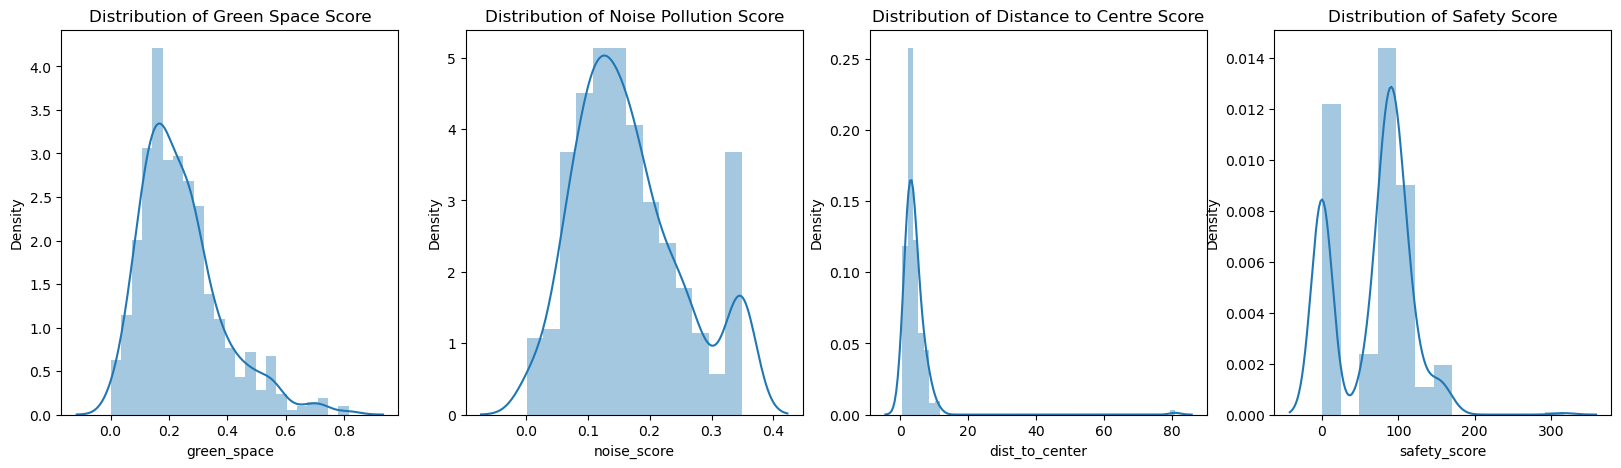

In [119]:
fig,ax = plt.subplots(1,4, figsize=(20,5))

sns.distplot(df["green_space"],kde=True,ax=ax[0])
sns.distplot(df["noise_score"],kde=True,ax=ax[1])
sns.distplot(df["dist_to_center"],kde=True,ax=ax[2])
sns.distplot(df["safety_score"],kde=True,ax=ax[3])

ax[0].set_title("Distribution of Green Space Score")
ax[1].set_title("Distribution of Noise Pollution Score")
ax[2].set_title("Distribution of Distance to Centre Score")
ax[3].set_title("Distribution of Safety Score")


In [123]:
r2_scores_gs_ns,rmses_gs_ns,mae_gs_ns,mses_gs_ns = run_test("data//funda_sample_ams_geocoded_gs_ns_circ_dtc_ss.csv")
r2_scores_gs,rmses_gs,mae_gs,mses_gs = run_test("data//funda_sample_ams_geocoded_gs_ns_circ_dtc.csv")
r2_scores,rmses,maes,mses = run_test("data//funda_sample_ams_geocoded.csv")

In [7]:
print(len(r2_scores_gs_ns))

7


[0 1 2 3 4 5 6]


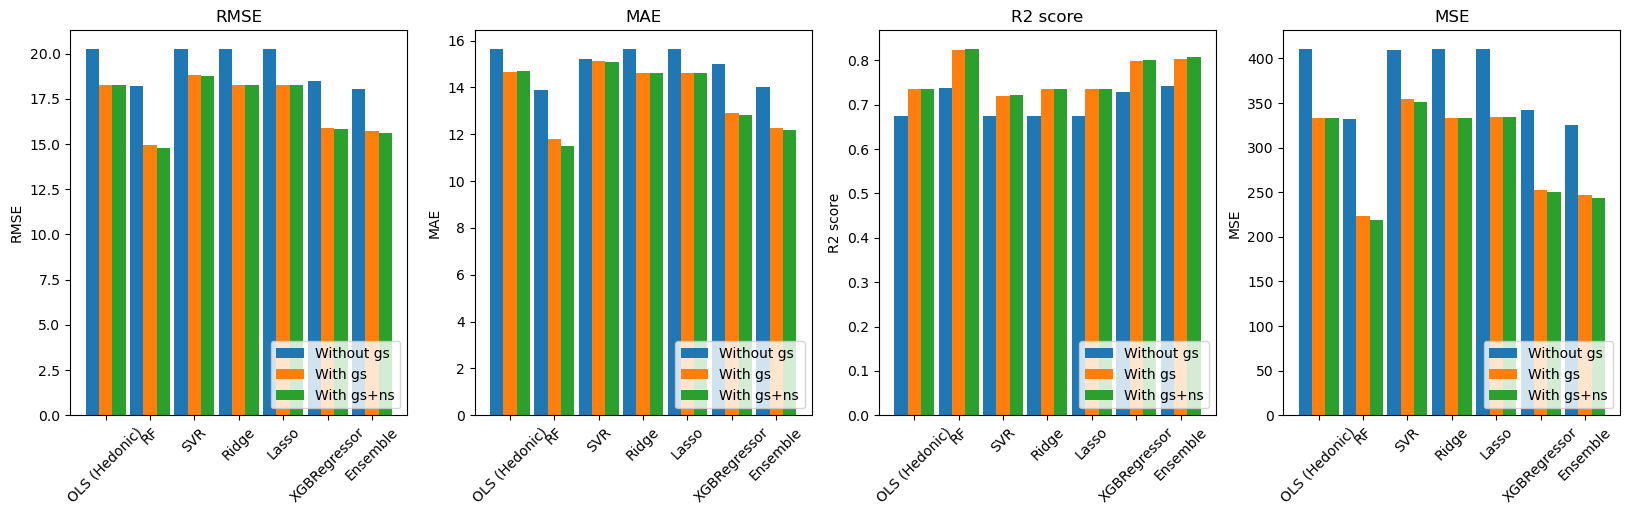

In [124]:
import matplotlib.pyplot as plt
import numpy as np

names = ["OLS (Hedonic)","RF","SVR","Ridge","Lasso","XGBRegressor","Ensemble"]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
indexes = np.arange(len(names))
bar_width = 0.3
gap_width = 0.0 # Width of the gap between groups
w=0.3
print(indexes)
ax[0].bar(indexes - w +gap_width, rmses, bar_width, label="Without gs")
ax[0].bar(indexes, rmses_gs, bar_width, label="With gs")
ax[0].bar(indexes +w-gap_width, rmses_gs_ns, bar_width, label="With gs+ns")
ax[0].set_xticks(indexes)

ax[1].bar(indexes - w+gap_width, maes, bar_width, label="Without gs")
ax[1].bar(indexes, mae_gs, bar_width, label="With gs")
ax[1].bar(indexes +w-gap_width, mae_gs_ns, bar_width, label="With gs+ns")
ax[1].set_xticks(indexes)

ax[2].bar(indexes - w+gap_width, r2_scores, bar_width, label="Without gs")
ax[2].bar(indexes, r2_scores_gs, bar_width, label="With gs")
ax[2].bar(indexes +w-gap_width, r2_scores_gs_ns, bar_width, label="With gs+ns")
ax[2].set_xticks(indexes)

ax[3].bar(indexes - w+gap_width, mses, bar_width, label="Without gs")
ax[3].bar(indexes, mses_gs, bar_width, label="With gs")
ax[3].bar(indexes +w-gap_width, mses_gs_ns, bar_width, label="With gs+ns")
ax[3].set_xticks(indexes)


ax[0].set_title("RMSE")
ax[1].set_title("MAE")
ax[2].set_title("R2 score")
ax[3].set_title("MSE")

ax[0].set_xticklabels(names, rotation=45)
ax[1].set_xticklabels(names, rotation=45)
ax[2].set_xticklabels(names, rotation=45)
ax[3].set_xticklabels(names, rotation=45)

ax[0].set_ylabel("RMSE")
ax[1].set_ylabel("MAE")
ax[2].set_ylabel("R2 score")
ax[3].set_ylabel("MSE")

ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")
ax[2].legend(loc="lower right")
ax[3].legend(loc="lower right")

plt.show()

### Total performance improvement (Hedonic v Alternative Data)

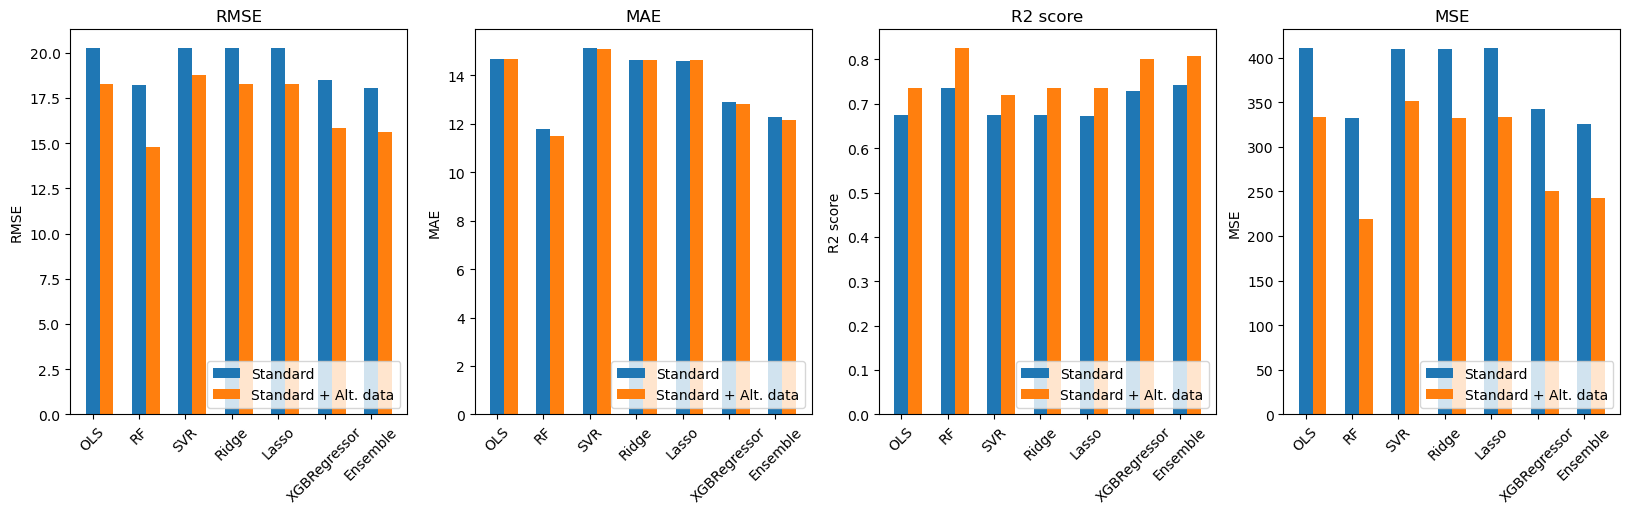

In [125]:
names = ["OLS","RF","SVR","Ridge","Lasso","XGBRegressor","Ensemble"]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
indexes = np.arange(len(names))
bar_width = 0.3
gap_width = 0.0# Width of the gap between groups
w=0.3
ax[0].bar(indexes, rmses, bar_width, label="Standard")
ax[0].bar(indexes+w, rmses_gs_ns, bar_width, label="Standard + Alt. data")

ax[0].set_xticks(indexes)

ax[1].bar(indexes,mae_gs, bar_width, label="Standard")
ax[1].bar(indexes+w, mae_gs_ns, bar_width, label="Standard + Alt. data")

ax[1].set_xticks(indexes)

ax[2].bar(indexes, r2_scores, bar_width, label="Standard")
ax[2].bar(indexes+w, r2_scores_gs_ns, bar_width, label="Standard + Alt. data")

ax[2].set_xticks(indexes)

ax[3].bar(indexes, mses, bar_width, label="Standard")
ax[3].bar(indexes+w, mses_gs_ns, bar_width, label="Standard + Alt. data")

ax[3].set_xticks(indexes)


ax[0].set_title("RMSE")
ax[1].set_title("MAE")
ax[2].set_title("R2 score")
ax[3].set_title("MSE")

ax[0].set_xticklabels(names, rotation=45)
ax[1].set_xticklabels(names, rotation=45)
ax[2].set_xticklabels(names, rotation=45)
ax[3].set_xticklabels(names, rotation=45)

ax[0].set_ylabel("RMSE")
ax[1].set_ylabel("MAE")
ax[2].set_ylabel("R2 score")
ax[3].set_ylabel("MSE")

ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")
ax[2].legend(loc="lower right")
ax[3].legend(loc="lower right")

plt.show()

### Improvement in $R^2$ and MSE scores

In [11]:
print(np.array(r2_scores_gs_ns)-np.array(r2_scores))

[0.06128163 0.09644861 0.04398357 0.06143081 0.06120508 0.0714654
 0.06286046]


|Metrics|OLS|RF | SVR | Ridge | Lasso | XGB |
|:--|:--|:--|:--|:--|:--|:--|
|$R^2$|0.06128163|0.09644861 | 0.04398357|0.06143081 |0.06120508 |0.0714654|
|MSE|-24.50|-57.23|-15.62|-26.19|-25.82|-33.65|

<AxesSubplot:>

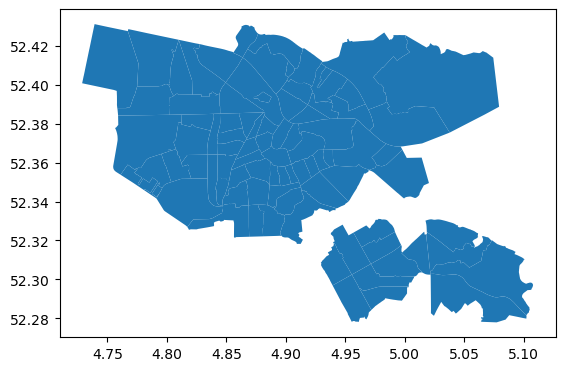

In [ ]:
df = pd.read_csv("data/PC4_BUURTEN.csv",sep=";",index_col=0)
from shapely import wkt
import geopandas as gpd
df["geometry"] = df["WKT_LNG_LAT"].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

gdf.plot()

In [ ]:
main_df = pd.read_csv('data/funda_sample_ams_geocoded_gs_ns_circ.csv',index_col=0)

In [ ]:
print(main_df["zip"].unique())

[1082 1073 1077 1063 1015 1013 1102 1032 1051 1104 1065 1094 1054 1076
 1034 1071 1079 1056 1083 1055 1093 1087 1097 1096 1057 1018 1019 1091
 1074 1061 1017 1068 1016 1059 1011 1058 1101 1035 1014 1053 1098 1092
 1095 1106 1062 1052 1064 1024 1067 1081 1072 1103 1066 1075 1031 1108
 1025 1107 1023 1036 1043 1033 1078 1069 1012 1060 1022 1086 1021]


In [ ]:
https://onderzoek.amsterdam.nl/interactief/dashboard-veiligheid?gebied=52&index=criminaliteit&subindex=totaal&indeling=wijk&meting=2022-3

In [22]:
df_crime = pd.read_csv("data/rest_api/data-geregistreerde-criminaliteit.csv",index_col=0)

In [23]:
print(df_crime)

                                        waarde
naam                                          
Burgwallen-Oude Zijde                      315
Burgwallen-Nieuwe Zijde                    319
Grachtengordel-West                        155
Grachtengordel-Zuid                        307
Nieuwmarkt / Lastage                       150
...                                        ...
Weesp Binnenstad / Zuid                     83
Weesp-Noordwest                             79
Weesp Aetsveld / Oostelijke Vechtoever      31
Weesp Hogewey                               55
Weesp Bloemendalerpolder                    23

[115 rows x 1 columns]


In [21]:
# [print(i + "\n") for i in df.index]

### Scraping post-codes

In [33]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


def get_district_from_zip(zip_code,driver):
    # Create a webdriver instance
    # Replace with the path of your webdriver

    # Navigate to the website
    driver.get(f'https://postcode.site/noord-holland/amsterdam/{zip_code}')  # Replace with the URL of the website you want to scrape



    # Wait for the element to load
    wait = WebDriverWait(driver, 10)  # Wait for a maximum of 10 seconds
    element = wait.until(EC.presence_of_element_located((By.XPATH, '/html/body/div[3]/div[4]/div/div/div[1]/p[2]')))  # Replace with the XPath of the element you want to scrape

    # Extract the text from the element
    result = element.text
    # print('Scraped Result:', result)
    return result
    # Close the webdriver


In [110]:
df = pd.read_csv("data/funda_sample_ams_geocoded_gs_ns_circ_dtc.csv",index_col=0)
print(df.columns)

Index(['house_id', 'city', 'house_type', 'building_type', 'price', 'price_m2',
       'room', 'bedroom', 'bathroom', 'living_area', 'energy_label',
       'has_balcony', 'has_garden', 'zip', 'address', 'year_built',
       'house_age', 'date_list', 'ym_list', 'year_list', 'descrip', 'ym_sold',
       'year_sold', 'term_days', 'date_sold', 'lat', 'lng', 'loc_type',
       'green_space', 'noise_score', 'dist_to_center'],
      dtype='object')


In [37]:
from selenium.webdriver.chrome.options import Options

chrome_options = Options()

chrome_options.add_argument("--headless")
driver = webdriver.Chrome(options=chrome_options)  
zips = pd.read_csv("data/funda_sample_ams_geocoded_gs_ns_circ_dtc.csv")["zip"].tolist()
ZIP_DICT = {}

for i,zip_code in enumerate(zips):
    print(f"{i+1} out of {len(zips)}")
    val = get_district_from_zip(zip_code, driver)
    try:
        val = val.split("that are the districts:")[1][:-1]
        
        try:
            dist = val.split(",").split(" and ")
        except:
            dist = val.split(" and ")
    except:
        dist = val.split("that is the district " )[1][:-3]
    ZIP_DICT[zip_code] = dist
    # print(f"{zip_code}: {dist}")
driver.quit()

1 out of 589
2 out of 589
3 out of 589
4 out of 589
5 out of 589
6 out of 589
7 out of 589
8 out of 589
9 out of 589
10 out of 589
11 out of 589
12 out of 589
13 out of 589
14 out of 589
15 out of 589
16 out of 589
17 out of 589
18 out of 589
19 out of 589
20 out of 589
21 out of 589
22 out of 589
23 out of 589
24 out of 589
25 out of 589
26 out of 589
27 out of 589
28 out of 589
29 out of 589
30 out of 589
31 out of 589
32 out of 589
33 out of 589
34 out of 589
35 out of 589
36 out of 589
37 out of 589
38 out of 589
39 out of 589
40 out of 589
41 out of 589
42 out of 589
43 out of 589
44 out of 589
45 out of 589
46 out of 589
47 out of 589
48 out of 589
49 out of 589
50 out of 589
51 out of 589
52 out of 589
53 out of 589
54 out of 589
55 out of 589
56 out of 589
57 out of 589
58 out of 589
59 out of 589
60 out of 589
61 out of 589
62 out of 589
63 out of 589
64 out of 589
65 out of 589
66 out of 589
67 out of 589
68 out of 589
69 out of 589
70 out of 589
71 out of 589
72 out of 589
7

In [39]:
print(len(ZIP_DICT.keys()))

69


### Mapping Post Codes to Districts

In [91]:
vals = [ i for i in ZIP_DICT.values()]
unique_dist = []
for district in vals:

    if district != "":
        if isinstance(district, list):
            i = district[0].split(",")
            unique_dist = unique_dist + i
        else:
            i = district
            unique_dist.append(i)
unique_dist = list(set(unique_dist))
to_change = []
for i in unique_dist:
    if i not in df_crime.index.tolist():
        to_change.append(i)
        
print(to_change)

['', 'Kinkerbuurt', 'IJburg West', 'Nieuwmarkt/Lastage', 'Bijlmer Oost (E,G,K)', 'Omval/Overamstel', 'Vondelbuurt', 'Nieuwendammerdijk/Buiksloterdijk', 'Lutkemeer/Ookmeer', 'Bijlmer Centrum (D,F,H)', 'Westelijk Havengebied', 'Kadoelen', 'Noordelijke IJ-oevers Oost', 'IJplein/Vogelbuurt', 'Houthavens', 'Frederik Hendrikbuurt', 'Sloterdijk', 'Prinses Irenebuurt e.o.', 'Zeeburgereiland/Nieuwe Diep', 'Middelveldsche Akerpolder', 'Holendrecht/Reigersbos', 'Helmersbuurt', 'Tuindorp Buiksloot', 'Noordelijke IJ-oevers West', 'Oostzanerwerf', 'IJburg Zuid', 'Tuindorp Nieuwendam', 'Spaarndammer- en Zeeheldenbuurt', 'Bedrijventerrein Sloterdijk']


In [100]:
print(df_crime.at["Burgwallen-Oude Zijde","waarde"])

315


In [86]:
right_vals = [
    "K-buurt",
    "IJburg-West",
    "Nieuwmarkt / Lastage",
    "Bijlmermuseum",
    "Slotermeer-West",
    "Omval / Overamstel",
    "Helmersbuurt / Vondelparkbuurt",
    "Indische Buurt-West",
    "Tuindorp Nieuwendam / Buiksloot / Ndammer- / Buiksloterdijk",
    "De Aker / Lutkemeer / Ookmeer",
    "Bijlmermuseum",
    "H-buurt",
    "Oostzanerwerf / Kadoelen",
    "Ijplein / Vogelbuurt (Noordelijke IJ-oevers-Oost)",
    "Ijplein / Vogelbuurt (Noordelijke IJ-oevers-Oost)",
    "Oostelijke Eilanden / Kadijken",
    "Reigersbos / Amstel III / Bullewijk",
    "Spaarndammerbuurt / Zeeheldenbuurt / Houthavens",
    "Frederik Hendrikbuurt / Centrale Markt",
    "Landlust / Sloterdijk-West",
    "Zuidas / Prinses Irenebuurt e.o.",
    "Zeeburgereiland / Bovendiep",
    "Middenmeer",
    "Holendrecht",
    "Slotervaart-Zuid",
    "Tuindorp Nieuwendam / Buiksloot / Ndammer- / Buiksloterdijk",
    "Indische Buurt-Oost",
    "Ijplein / Vogelbuurt (Noordelijke IJ-oevers-Oost)",
    "Oostzanerwerf / Kadoelen",
    "IJburg-Oost / IJburg-Zuid",
    "Tuindorp Nieuwendam / Buiksloot / Ndammer- / Buiksloterdijk",
    "Spaarndammerbuurt / Zeeheldenbuurt / Houthavens",
    "Tuindorp Nieuwendam / Buiksloot / Ndammer- / Buiksloterdijk"
    
    

    
]
change_dict = dict(zip(to_change[1:],right_vals))

In [88]:
print(ZIP_DICT)

{1082: ['Buitenveldert-Oost,Buitenveldert-West', 'Zuidas'], 1073: ['Oude Pijp,Nieuwe Pijp', 'Zuid Pijp'], 1077: ['Apollobuurt,Prinses Irenebuurt e.o.', 'Zuidas'], 1063: ['Slotermeer-Noordoost', 'Slotermeer-Zuidwest'], 1015: ['Grachtengordel-West', 'Jordaan'], 1013: ['Haarlemmerbuurt,Westelijk Havengebied,Houthavens', 'Spaarndammer- en Zeeheldenbuurt'], 1102: 'Bijlmer Centrum (D,F,H)', 1032: ['Volewijck', 'Noordelijke IJ-oevers West'], 1051: ['Staatsliedenbuurt', 'Centrale Markt'], 1104: 'Bijlmer Oost (E,G,K)', 1065: ['Slotervaart Noord', 'Slotervaart Zuid'], 1094: 'Indische Buurt West', 1054: ['Helmersbuurt,Vondelbuurt,Overtoomse Sluis', 'Centrale Markt'], 1076: ['Stadionbuurt,Prinses Irenebuurt e.o.', 'Zuidas'], 1034: ['Banne Buiksloot,Kadoelen,Noordelijke IJ-oevers West', 'Nieuwendammerdijk/Buiksloterdijk'], 1071: 'Museumkwartier', 1079: ['Scheldebuurt', 'Rijnbuurt'], 1056: ['Van Galenbuurt,De Kolenkit,Erasmuspark,Geuzenbuurt', 'Landlust'], 1083: ['Buitenveldert-Oost', 'Zuidas'], 105

In [92]:
for key in ZIP_DICT.keys():
    if isinstance(ZIP_DICT[key],list):
        scores = []
        for i,elem in enumerate(ZIP_DICT[key]):
            if elem in change_dict.keys():
                ZIP_DICT[key][i] = change_dict[elem]
                print("REPLACED")
    else:
        if elem in change_dict.keys():
            ZIP_DICT[key] = change_dict[elem]

In [103]:
for key in ZIP_DICT.keys():
    if isinstance(ZIP_DICT[key],list):
        scores = []
        for i,elem in enumerate(ZIP_DICT[key]):
            if elem in df_crime.index.tolist():
                scores.append(df_crime.at[elem,"waarde" ])
                print(elem)
        ZIP_DICT[key] = sum(scores)/(len(scores)+0.0001)
    else:
        if elem in df_crime.index.tolist():
            ZIP_DICT[key] = df_crime.at[elem,"waarde" ]

Zuid Pijp
Slotermeer-Noordoost
Slotermeer-West
Grachtengordel-West
Jordaan
Volewijck
IJburg-Oost / IJburg-Zuid
Staatsliedenbuurt
Slotervaart-Zuid
Indische Buurt-Oost
Tuindorp Nieuwendam / Buiksloot / Ndammer- / Buiksloterdijk
Scheldebuurt
Rijnbuurt
Buitenveldert-Oost
Betondorp
Overtoomse Veld
Oostelijke Eilanden / Kadijken
Oostelijk Havengebied
Oostelijke Eilanden / Kadijken
Transvaalbuurt
Zuid Pijp
Overtoomse Veld
De Kolenkit
Nieuwe Pijp
Osdorp-Oost
De Aker / Lutkemeer / Ookmeer
Grachtengordel-West
Jordaan
Hoofddorppleinbuurt
Westlandgracht
Hoofddorppleinbuurt
Reigersbos / Amstel III / Bullewijk
Bijlmermuseum
Tuindorp Nieuwendam / Buiksloot / Ndammer- / Buiksloterdijk
Oostzanerwerf / Kadoelen
Spaarndammerbuurt / Zeeheldenbuurt / Houthavens
Van Lennepbuurt
Oosterparkbuurt
Transvaalbuurt
Oostzanerwerf / Kadoelen
Zeeburgereiland / Bovendiep
Bijlmermuseum
Slotervaart-Zuid
K-buurt
Slotermeer-West
Slotervaart-Zuid
Buitenveldert-West
Oude Pijp
Nieuwe Pijp
Indische Buurt-Oost
Overtoomse Sluis

In [104]:
print(ZIP_DICT)

{1082: 0.0, 1073: 81.99180081991801, 1077: 0.0, 1063: 117.4941252937353, 1015: 149.99250037498123, 1013: 0.0, 1102: 'Bijlmer Centrum (D,F,H)', 1032: 88.49557522123892, 1051: 75.99240075992401, 1104: 'Bijlmer Oost (E,G,K)', 1065: 100.49497525123743, 1094: 98, 1054: 0.0, 1076: 0.0, 1034: 53.994600539946006, 1071: 54, 1079: 71.996400179991, 1056: 0.0, 1083: 76.992300769923, 1055: 0.0, 1093: 'Dapperbuurt', 1087: 0.0, 1097: 75.99240075992401, 1096: 76, 1057: 106.98930106989302, 1018: 99.9900009999, 1019: 86.49567521623918, 1091: 87.99120087991201, 1074: 81.99180081991801, 1061: 96.49517524123793, 1017: 87.99120087991201, 1068: 93.4953252337383, 1016: 149.99250037498123, 1059: 101.99490025498724, 1011: 114, 1058: 89.99100089991, 1101: 164.99175041247935, 1035: 59.997000149992495, 1014: 122.98770122987702, 1053: 98.99010098990101, 1098: 99, 1092: 119.99400029998499, 1095: 86.99565021748911, 1106: 126.98730126987302, 1062: 102.989701029897, 1052: 80.991900809919, 1064: 112.49437528123593, 1024

In [120]:
for i,row in df.iterrows():
  
    if isinstance(ZIP_DICT[row["zip"]],float):
        df.at[i,"safety_score"] = ZIP_DICT[row["zip"]]
    else:
        df.at[i,"safety_score"] = np.nan

In [121]:
df["safety_score"] = df["safety_score"]/max(df["safety_score"])

In [122]:
df.to_csv("data/funda_sample_ams_geocoded_gs_ns_circ_dtc_ss.csv")

In [69]:
[print(i) for i in df_crime.index.sort_values()]

Amstelveen Nieuw Zuid
Amstelveen Noord
Amstelveen Oost
Amstelveen Oud Zuid
Amstelveen Westwijk e.o.
Amsterdamse Poort e.o.
Apollobuurt
Banne Buiksloot
Bellamybuurt
Betondorp
Bijlmermuseum
Buikslotermeer
Buitenveldert-Oost
Buitenveldert-West
Burgwallen-Nieuwe Zijde
Burgwallen-Oude Zijde
Centrum / Zuid
Chassébuurt
Da Costabuurt
Dapperbuurt
De Aker / Lutkemeer / Ookmeer
De Kolenkit
De Kwakel en Buitengebied
De Punt
De Weteringschans
Diemen Centrum
Diemen Noord
Diemen Zuid
Driemond
Duivendrecht
Elzenhagen
Erasmuspark
Frankendael
Frederik Hendrikbuurt / Centrale Markt
Ganzenhoef e.o.
Geerdinkhof / Kantershof
Gein
Geuzenbuurt
Geuzenveld
Grachtengordel-West
Grachtengordel-Zuid
H-buurt
Haarlemmerbuurt
Helmersbuurt / Vondelparkbuurt
Holendrecht
Holland Park
Hoofddorppleinbuurt
Hoofdweg e.o.
Hornmeer
IJburg-Oost / IJburg-Zuid
IJburg-West
IJselbuurt
Ijplein / Vogelbuurt (Noordelijke IJ-oevers-Oost)
Indische Buurt-Oost
Indische Buurt-West
Jordaan
K-buurt
Kudelstaart
Landlust / Sloterdijk-West
Legm

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]